In [1]:
!pip install yfinance==0.2.12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 9.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
 df = yf.download("ADANIENT.NS", start="2010-01-01", end="2023-02-21")
 df=df.round(2)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.sort_values(by ='Date', ascending = False).head()

Open     High      Low    Close  Adj Close    Volume
Date                                                              
2023-02-20  1650.0  1685.00  1560.50  1621.45    1621.45   6762330
2023-02-17  1800.0  1815.85  1703.20  1722.70    1722.70   5392513
2023-02-16  1820.0  1874.95  1790.00  1796.60    1796.60   5578515
2023-02-15  1780.0  1824.40  1750.00  1779.10    1779.10   7636578
2023-02-14  1735.0  1889.00  1611.35  1749.70    1749.70  14579030

In [4]:
df.tail()

Open     High      Low    Close  Adj Close    Volume
Date                                                              
2023-02-14  1735.0  1889.00  1611.35  1749.70    1749.70  14579030
2023-02-15  1780.0  1824.40  1750.00  1779.10    1779.10   7636578
2023-02-16  1820.0  1874.95  1790.00  1796.60    1796.60   5578515
2023-02-17  1800.0  1815.85  1703.20  1722.70    1722.70   5392513
2023-02-20  1650.0  1685.00  1560.50  1621.45    1621.45   6762330

In [5]:
df.shape

(3244, 6)

In [6]:
df = df.reset_index()

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
df['Date'].max() - df['Date'].min()

Timedelta('4795 days 00:00:00')

In [10]:
df.iloc[-90:].describe().astype(int)

Open  High   Low  Close  Adj Close    Volume
count    90    90    90     90         90        90
mean   3439  3496  3343   3416       3416   4676433
std     741   714   801    764        764   7181277
min    1490  1615  1017   1565       1565    248249
25%    3320  3345  3266   3302       3302   1280870
50%    3726  3811  3618   3718       3718   1852020
75%    3945  4018  3880   3928       3928   3693849
max    4175  4190  4066   4165       4165  43885579

In [11]:
df.index = df['Date']

**Now plot the closing price (adjusted) of the stock over the period of 14 years to get a general idea of how the stock performed in the given period**

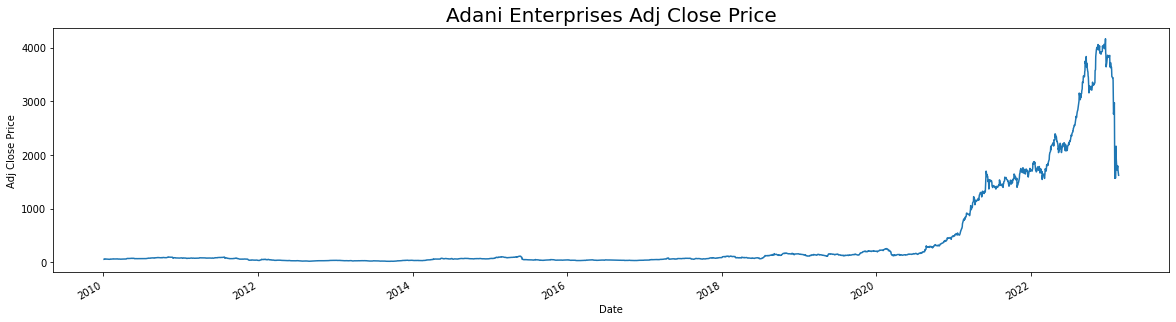

In [12]:
df['Adj Close'].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

* In the above plot, if you notice, there is a  increase in the price of stock sometime around 2021

**Let's plot for last 2 years and see the trends**

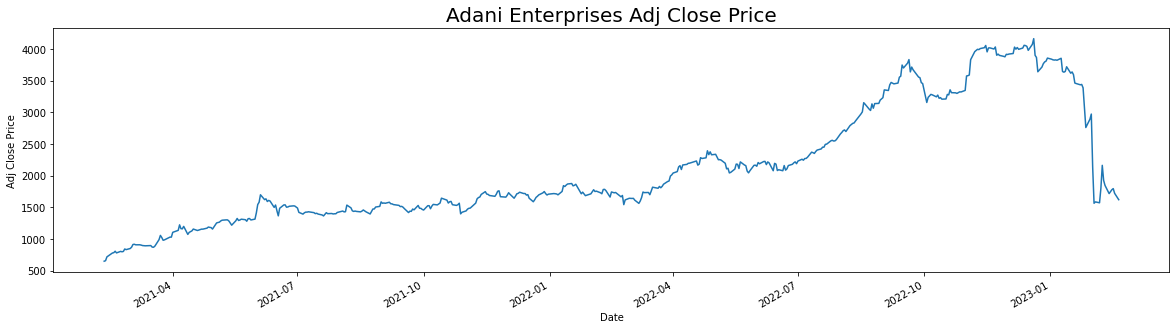

In [13]:
df['Adj Close'].iloc[-504:].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

* As the trends of the stock was upwards and suddenly there is a drastic decrese around Jan'21. The main reason for this drastic decrease was Hindenburg report

In [14]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100
df.head()

Date   Open   High    Low  Close  Adj Close   Volume  \
Date                                                                    
2010-01-04 2010-01-04  67.01  69.59  66.37  69.22      57.30  1860224   
2010-01-05 2010-01-05  69.43  71.11  69.43  70.82      58.62  2280286   
2010-01-06 2010-01-06  70.97  79.24  70.51  77.81      64.41  7326390   
2010-01-07 2010-01-07  79.61  79.61  74.03  74.60      61.75  4759208   
2010-01-08 2010-01-08  75.07  77.86  73.91  75.54      62.53  3324076   

            Day_Perc_Change  
Date                         
2010-01-04              NaN  
2010-01-05         2.303665  
2010-01-06         9.877175  
2010-01-07        -4.129794  
2010-01-08         1.263158

In [15]:
# Drop 1st value because it is Nan
df.dropna(axis = 0, inplace = True)

**Plot a graph for daily returns over the priods of 13 years**

Text(0, 0.5, 'Percenatge returns')

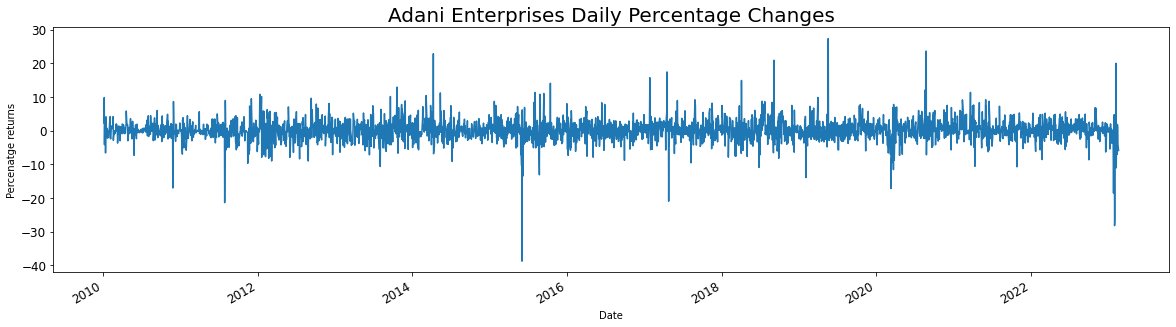

In [16]:
df['Day_Perc_Change'].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with few instance of drastic negative and postive changes

**Plot a graph for daily returns over the priods of 2 years**

Text(0, 0.5, 'Percenatge returns')

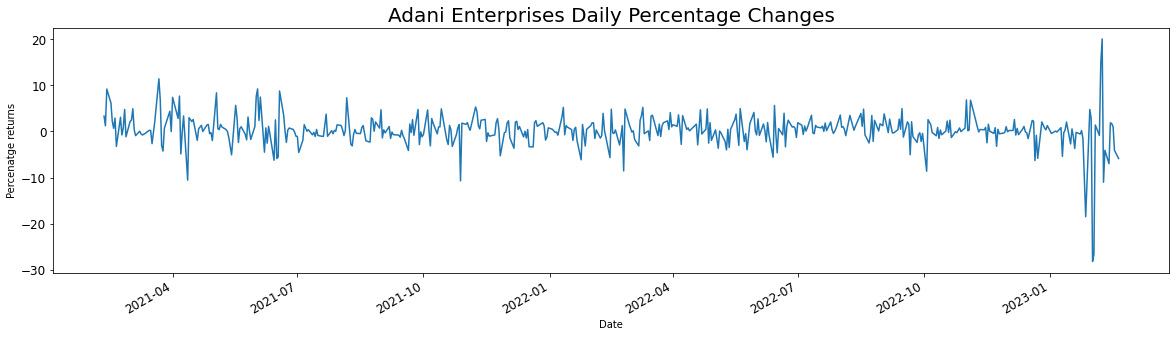

In [17]:
df['Day_Perc_Change'].iloc[-504:].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

* As observed, in thelast 2 years the daily returns percentage is fluctuatiing between -10 % to 10 % for most of the time with one instance of drastic negative changes in the month of Jan'23 due to hindenburg report

**Plot daily return distribution histogram**

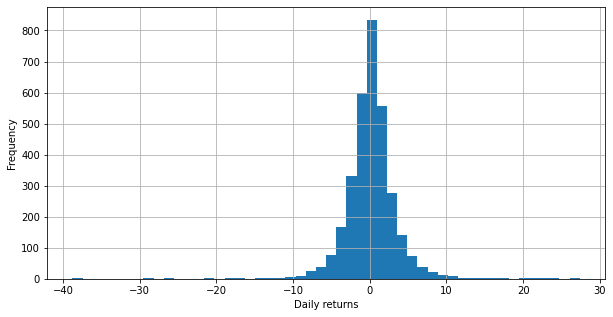

------------------------------------
Basic Statisics for Daily Percentages for 13 years


count    3243.000000
mean        0.157851
std         3.275377
min       -38.749320
25%        -1.312050
50%         0.102775
75%         1.618227
max        27.367529
Name: Day_Perc_Change, dtype: float64

In [18]:
df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 13 years")
df['Day_Perc_Change'].describe()

* The daily returns histogram is centered about origin. For the past 13 years, the mean daily returns has been about 0.161993% and for most of the days the daily return was less than 1% implying that the ADANI Enterprises stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 27.367529% and was 38.749320% in negative direction

**Plot daily return distribution histogram over the priods of 2 years**

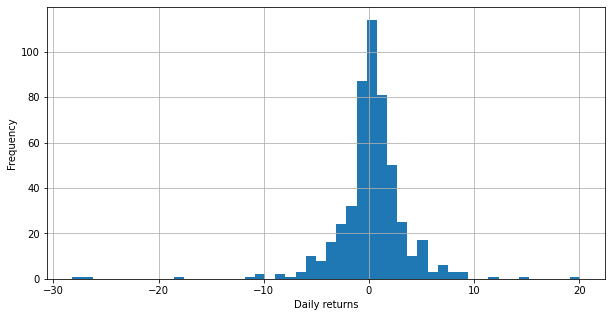

------------------------------------
Basic Statisics for Daily Percentages for 2 years


count    504.000000
mean       0.252905
std        3.511096
min      -28.196980
25%       -0.856410
50%        0.312104
75%        1.587520
max       20.039380
Name: Day_Perc_Change, dtype: float64

In [19]:
df['Day_Perc_Change'].iloc[-504:].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 2 years")
df['Day_Perc_Change'].iloc[-504:].describe()

* The daily returns histogram is centered about origin. For the past 2 years, the mean daily returns has been about 0.309905% and for most of the days the daily return was less than 1% implying that the ADANI Enterprises stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 20.039380% and was 28.196980% in negative direction

In [20]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

Date   Open   High    Low  Close  Adj Close   Volume  \
Date                                                                    
2010-01-05 2010-01-05  69.43  71.11  69.43  70.82      58.62  2280286   
2010-01-06 2010-01-06  70.97  79.24  70.51  77.81      64.41  7326390   
2010-01-07 2010-01-07  79.61  79.61  74.03  74.60      61.75  4759208   
2010-01-08 2010-01-08  75.07  77.86  73.91  75.54      62.53  3324076   
2010-01-11 2010-01-11  75.72  77.70  75.72  76.89      63.65  1196678   

            Day_Perc_Change             Trend  
Date                                           
2010-01-05         2.303665          Positive  
2010-01-06         9.877175          Bull run  
2010-01-07        -4.129794  Among top losers  
2010-01-08         1.263158          Positive  
2010-01-11         1.791140          Positive

### **Pie chart**

**Past 13 years trend**

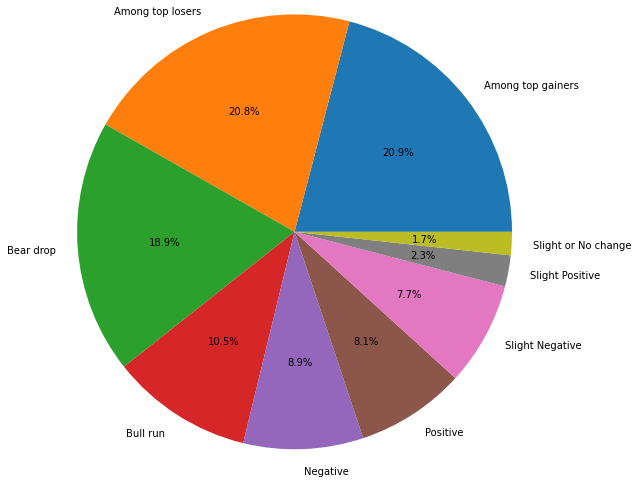

In [21]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

**Past 2 years trend**

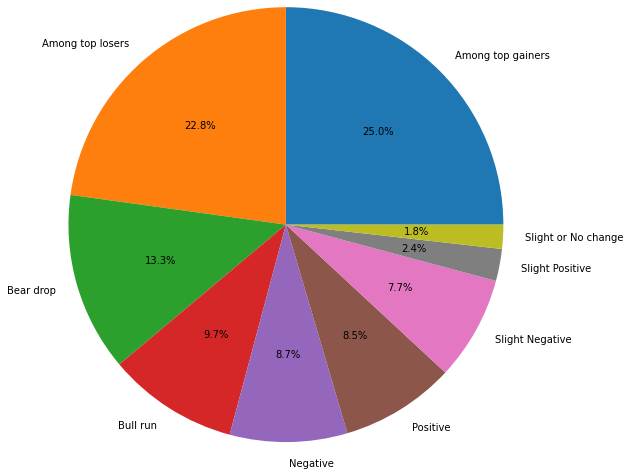

In [22]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].iloc[-504:].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

## **Daily Returns and Volume**

**FOr 13 years period**

<AxesSubplot:xlabel='Date'>

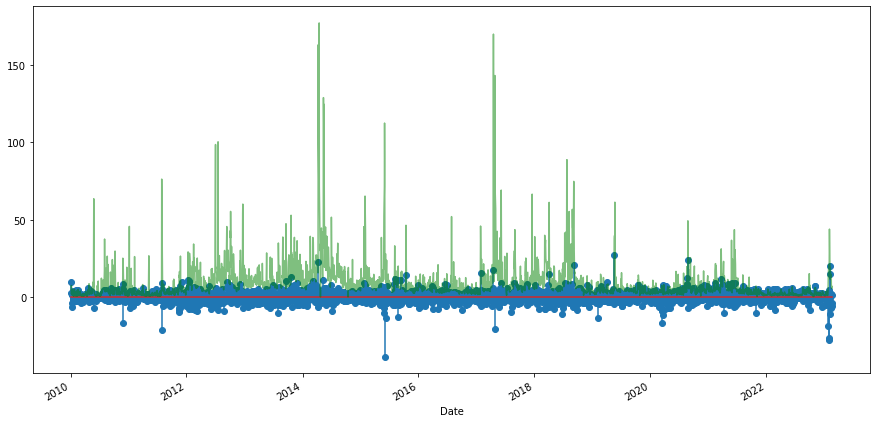

In [23]:
plt.stem(df['Date'], df['Day_Perc_Change'])
(df['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

**FOr 2 years period**

<AxesSubplot:xlabel='Date'>

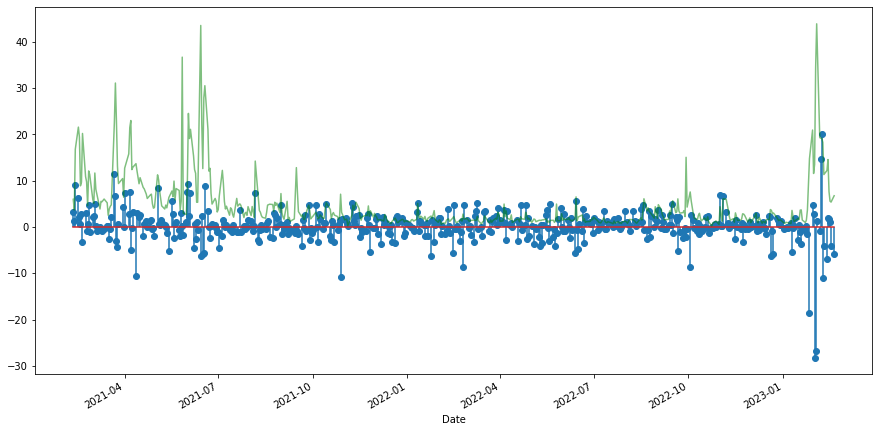

In [24]:
plt.stem(df['Date'].iloc[-504:], df['Day_Perc_Change'].iloc[-504:])
(df['Volume'].iloc[-504:]/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

In [25]:
# Adj close price of all the stocks
combined_df = yf.download(["ADANIENT.NS","TATASTEEL.NS","PAGEIND.NS","EICHERMOT.NS","INFY.NS"], start="2010-01-01", end="2023-02-12")['Adj Close']
combined_df = combined_df.round(2)
combined_df.head()

[*********************100%***********************]  5 of 5 completed


ADANIENT.NS  EICHERMOT.NS  INFY.NS  PAGEIND.NS  TATASTEEL.NS
Date                                                                    
2010-01-04        57.30         57.19   246.82      752.71         20.36
2010-01-05        58.62         55.28   247.65      754.24         20.86
2010-01-06        64.41         54.82   244.03      749.75         20.63
2010-01-07        61.75         54.05   238.55      758.60         20.88
2010-01-08        62.53         54.78   232.80      758.38         20.84

### **Pairplot**

<Figure size 1440x360 with 0 Axes>

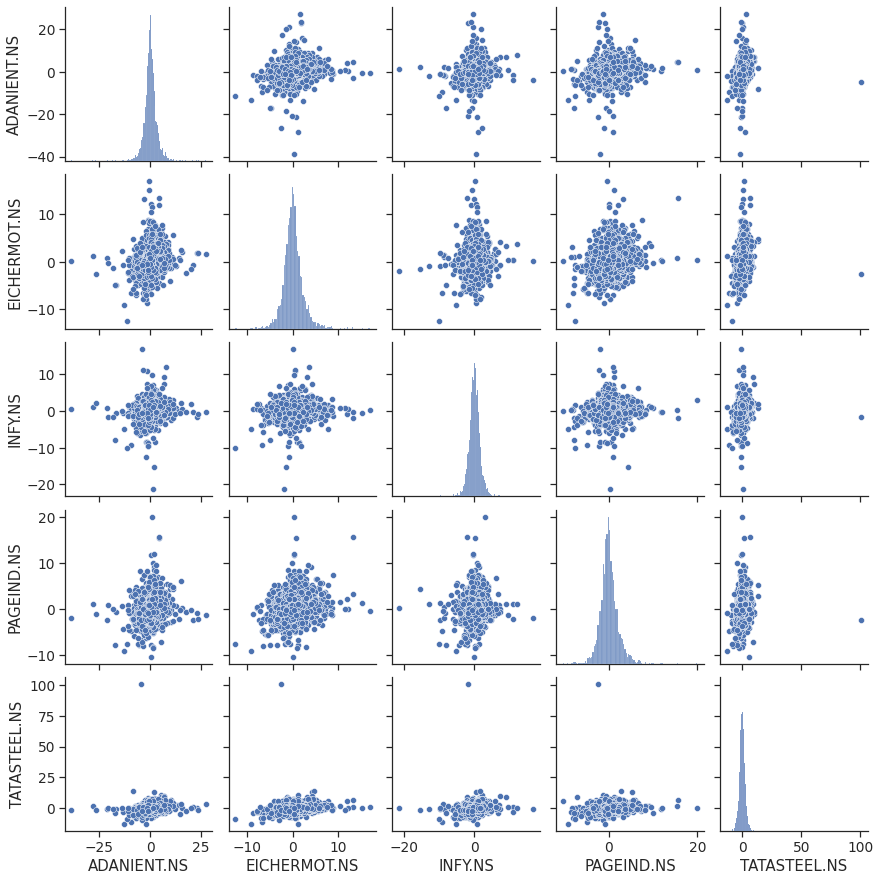

In [26]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot  
import seaborn as sns
plt.figure(figsize = (20,5))
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

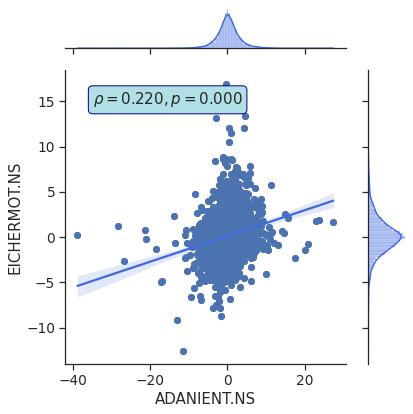

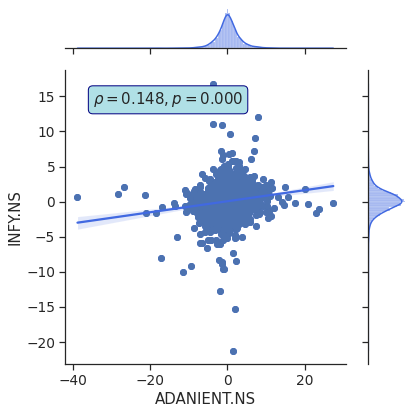

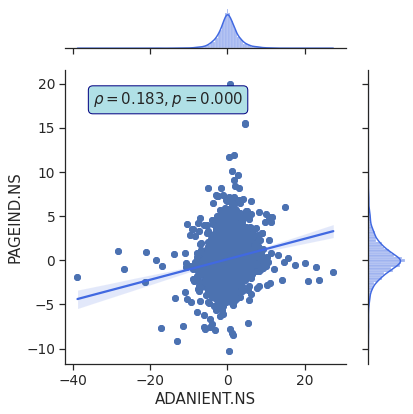

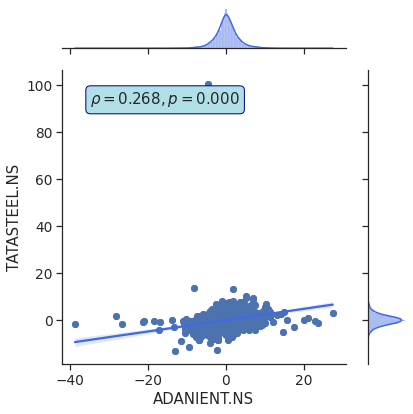

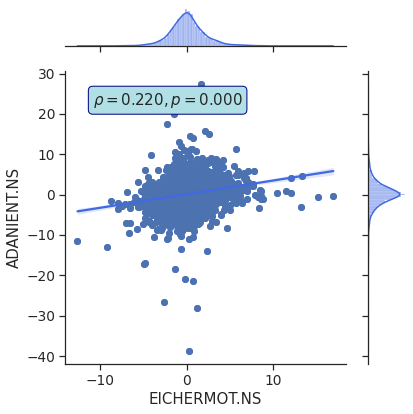

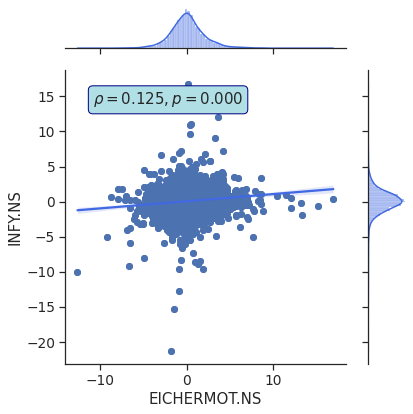

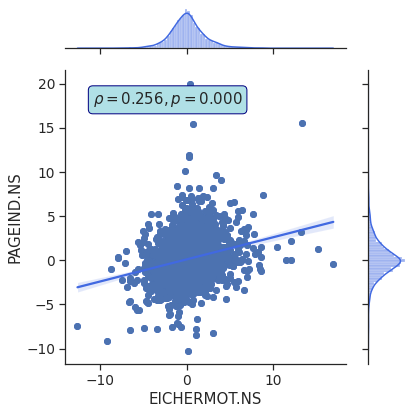

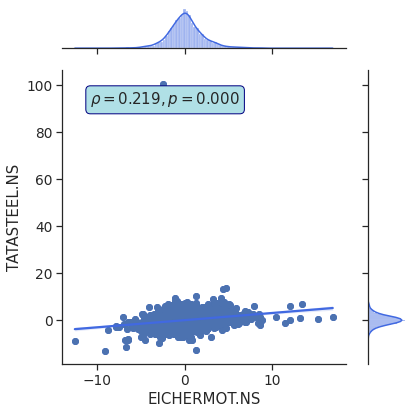

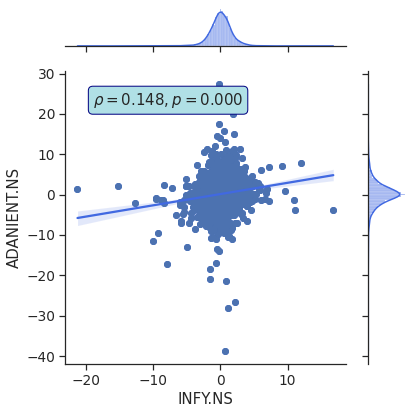

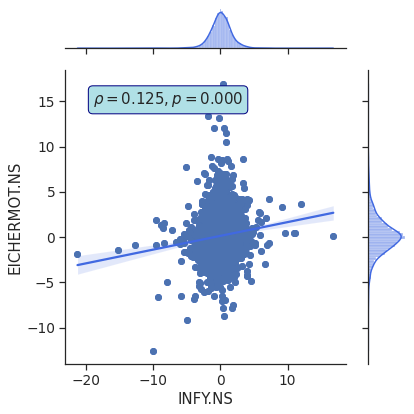

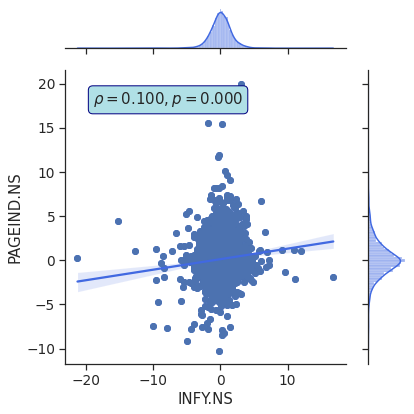

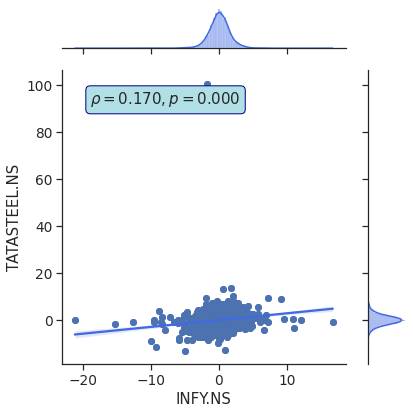

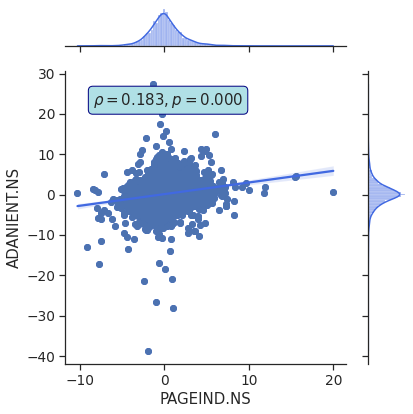

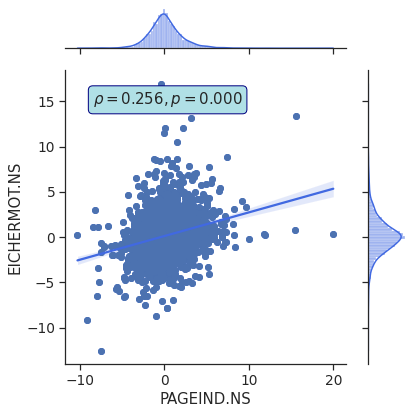

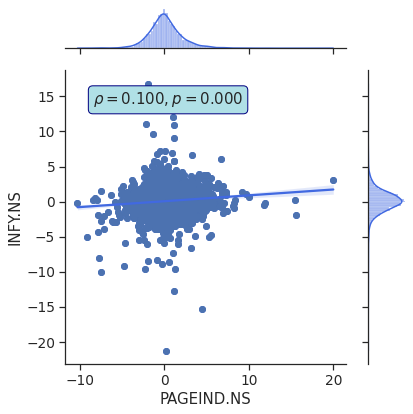

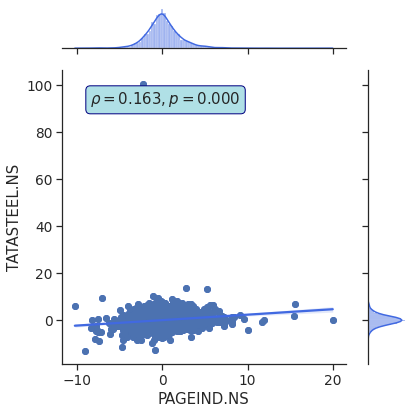

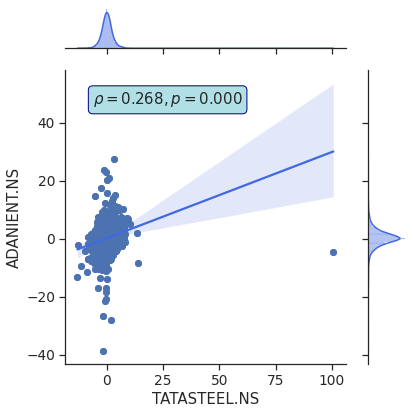

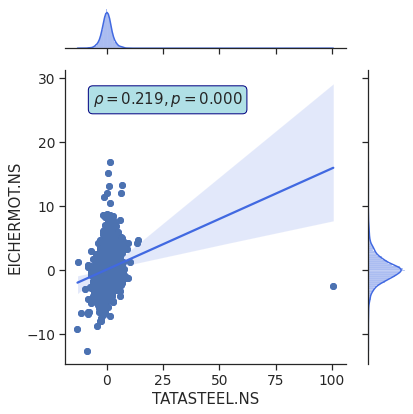

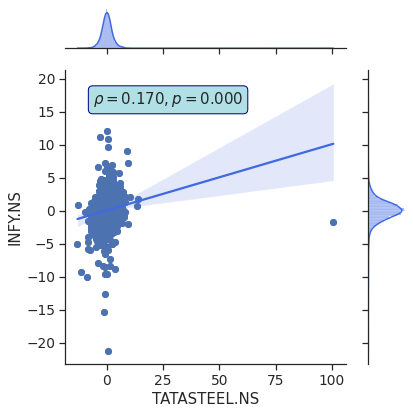

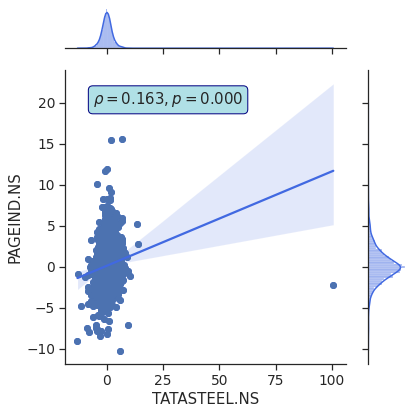

In [27]:
from scipy.stats import stats

def joint_plot(df, a, b):
  g = sns.jointplot(x=df[a], y=df[b], kind='reg', color='royalblue')
  r, p = stats.pearsonr(df[a], df[b])
  g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
  g.ax_joint.scatter(df[a], df[b])
  g.set_axis_labels(xlabel=a, ylabel=b, size=15)
  plt.tight_layout()
  return g
index = 1
for i in pct_chg_df.columns:
  for j in pct_chg_df.columns:
      if i!=j:
        joint_plot(pct_chg_df,i,j)

* All of the stocks are less correlated. So, we can include all the stocks in our portfolio
* Beware! having correlation is not the only parameter to determine which stocks to include in an portfolio and which to remove. There are several other factors at play

Text(0.5, 1.0, 'Adani Enterprises Volatility')

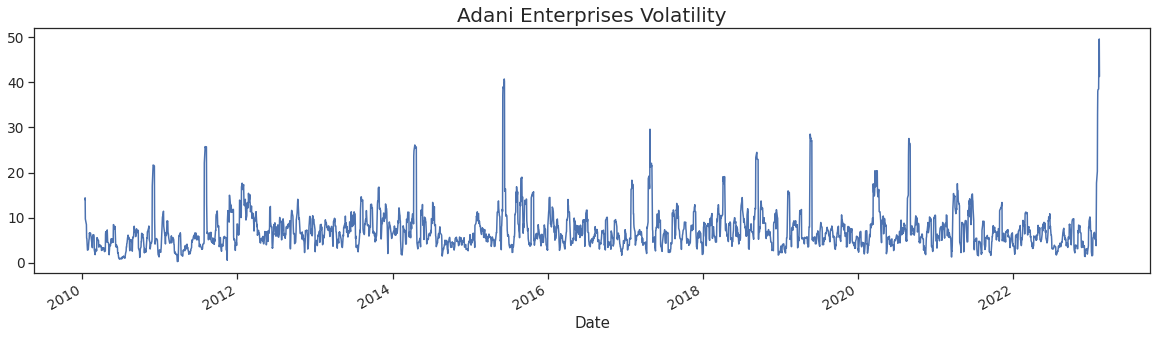

In [28]:
ADANI_vol = pct_chg_df['ADANIENT.NS'].rolling(7).std()*np.sqrt(7)
ADANI_vol.plot(figsize = (20, 5))
plt.title("Adani Enterprises Volatility", fontsize = 20)

Text(0.5, 1.0, 'Stock Returns Volatility')

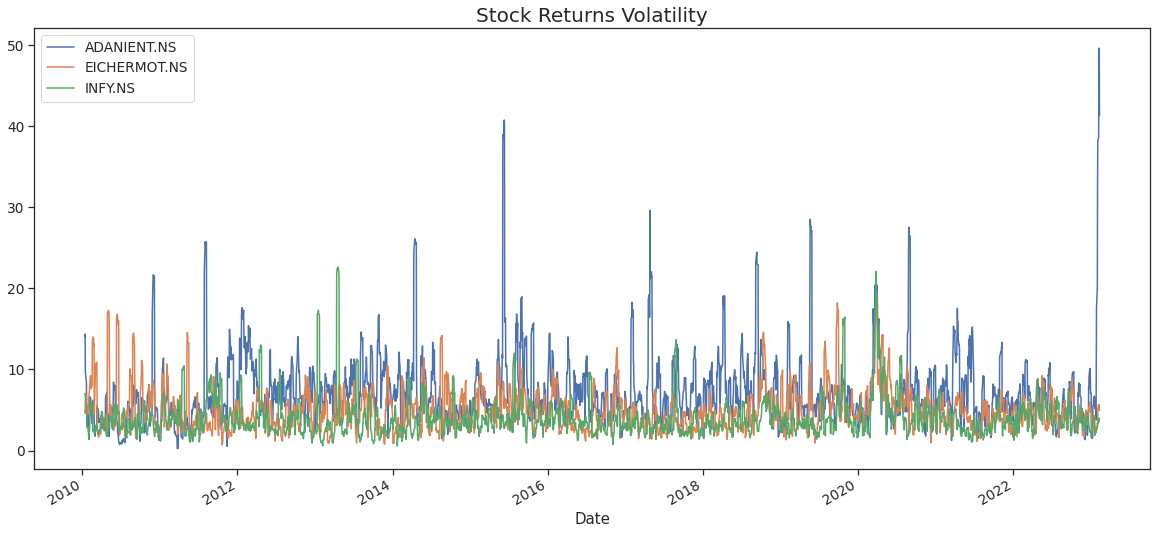

In [29]:
volatility = pct_chg_df[['ADANIENT.NS','EICHERMOT.NS','INFY.NS']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (20, 9))
plt.title("Stock Returns Volatility", fontsize = 20)

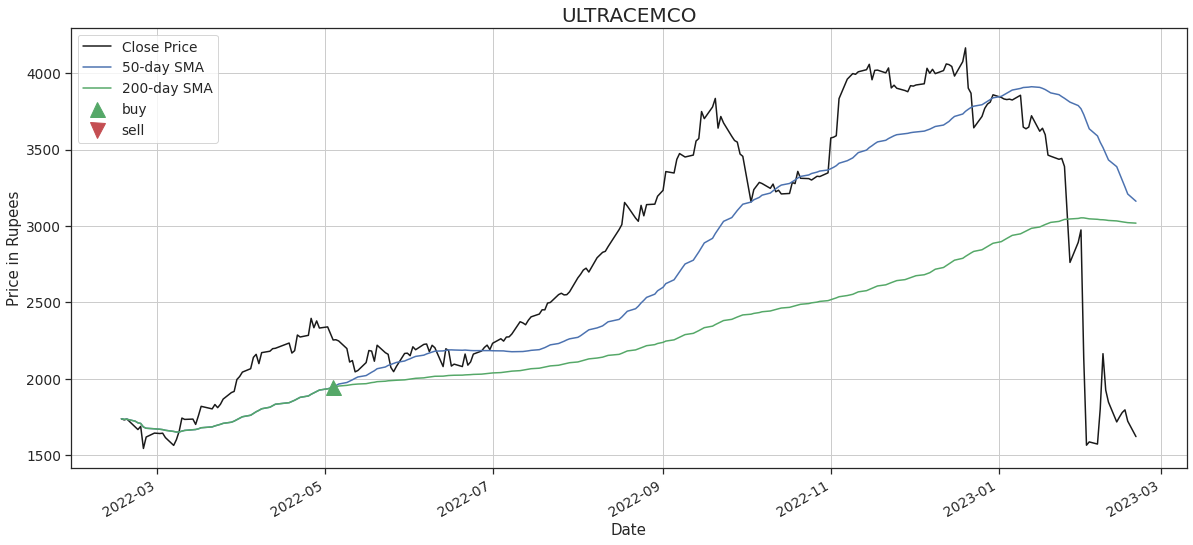

In [59]:
# create 20 days simple moving average column
df['50_SMA'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# create 50 days simple moving average column
df['200_SMA'] = df['Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
df['Signal'] = 0.0
df['Signal'] = np.where(df['50_SMA'] > df['200_SMA'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()
plt.figure(figsize = (20,9))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close Price') 
df['50_SMA'].plot(color = 'b',label = '50-day SMA') 
df['200_SMA'].plot(color = 'g', label = '200-day SMA')
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index, df['50_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df[df['Position'] == -1].index, df['200_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

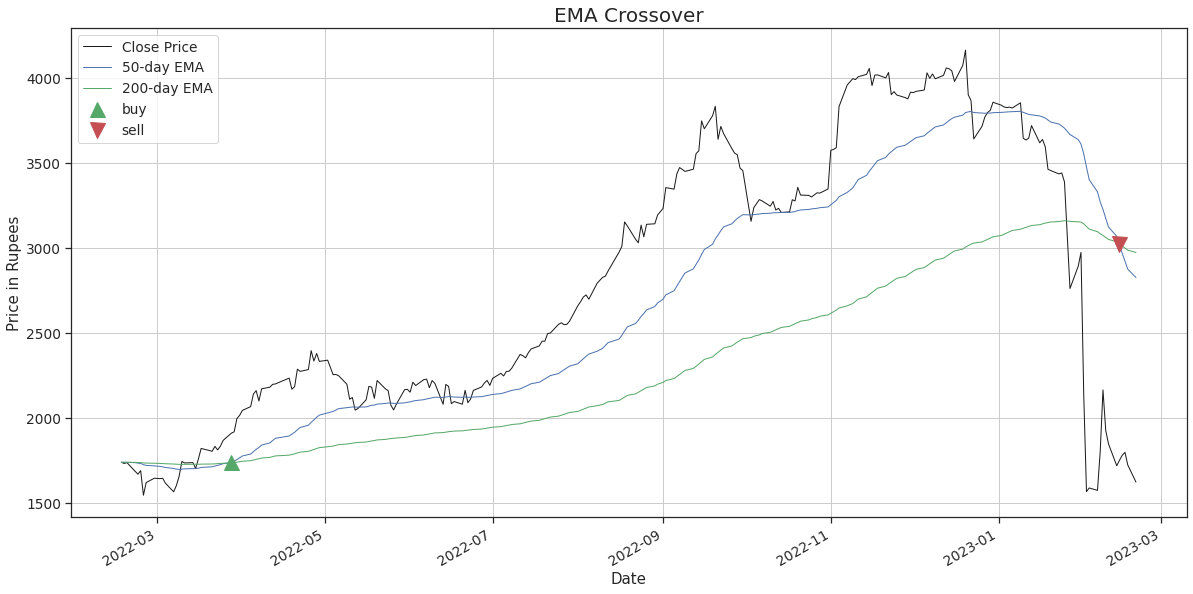

In [63]:
# Create 50 days exponential moving average column
df['50_EMA'] = df['Close'].ewm(span = 50, adjust = False).mean()
# Create 200 days exponential moving average column
df['200_EMA'] = df['Close'].ewm(span = 200, adjust = False).mean()
# create a new column 'Signal' such that if 50-day EMA is greater   # than 200-day EMA then set Signal as 1 else 0
df['Signal'] = 0.0  
df['Signal'] = np.where(df['50_EMA'] > df['200_EMA'], 1.0, 0.0)
# create a new column 'Position' which is a day-to-day difference of # the 'Signal' column
df['Position'] = df['Signal'].diff()
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', lw = 1, label = 'Close Price')  
df['50_EMA'].plot(color = 'b', lw = 1, label = '50-day EMA') 
df['200_EMA'].plot(color = 'g', lw = 1, label = '200-day EMA')
# plot 'buy' and 'sell' signals
plt.plot(df[df['Position'] == 1].index, df['50_EMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, df['200_EMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('EMA Crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [32]:
!pip install ta==0.10.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29106 sha256=07584adeaaad8d458168254c143000b5391d79ef97184ad49abfd641d51e2df4
  Stored in directory: /root/.cache/pip/wheels/1b/81/50/db21d9643326c61dd6fee1dc2562d8351ee7753164c24ead38
Successfully built ta


In [33]:
from ta.trend import MACD

In [34]:
def generate_buy_sell_signals(condition_buy, condition_sell, dataframe, strategy):
    last_signal = None
    indicators = []
    buy = []
    sell = []
    for i in range(0, len(dataframe)):
        # if buy condition is true and last signal was not Buy
        if condition_buy(i, dataframe) and last_signal != 'Buy':
            last_signal = 'Buy'
            indicators.append(last_signal)
            buy.append(dataframe['Close'].iloc[i])
            sell.append(np.nan)
        # if sell condition is true and last signal was Buy
        elif condition_sell(i, dataframe)  and last_signal == 'Buy':
            last_signal = 'Sell'
            indicators.append(last_signal)
            buy.append(np.nan)
            sell.append(dataframe['Close'].iloc[i])
        else:
            indicators.append(last_signal)
            buy.append(np.nan)
            sell.append(np.nan)

    dataframe[f"{strategy}_Last_Signal"] = np.array(last_signal)
    dataframe[f"{strategy}_Indicator"] = np.array(indicators)
    dataframe[f"{strategy}_Buy"] = np.array(buy)
    dataframe[f"{strategy}_Sell"] = np.array(sell)

In [35]:
def get_macd(company):
    close_prices = company['Close']
    window_slow = 26
    signal = 9
    window_fast = 12
    macd = MACD(close_prices, window_slow, window_fast, signal)
    company['MACD'] = macd.macd()
    company['MACD_Histogram'] = macd.macd_diff()
    company['MACD_Signal'] = macd.macd_signal()

    generate_buy_sell_signals(
    lambda x, company: company['MACD'].values[x] < company['MACD_Signal'].iloc[x],
    lambda x, company: company['MACD'].values[x] > company['MACD_Signal'].iloc[x],
    company,
    'MACD')
    return company

In [36]:
def plot_price_and_signals(fig, company, data, strategy, axs):
    last_signal_val = data[f"{strategy}_Last_Signal"].values[-1]
    last_signal = 'Unknown' if not last_signal_val else last_signal_val
    title = f'Close Price Buy/Sell Signals using {strategy}.  Last Signal: {last_signal}'
    fig.suptitle(f'Top: ADANI Stock Price. Bottom: {strategy}')

    if not data[f'{strategy}_Buy'].isnull().all():
        axs[0].scatter(data.index, data[f'{strategy}_Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
    if not data[f'{strategy}_Sell'].isnull().all():
        axs[0].scatter(data.index, data[f'{strategy}_Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
    axs[0].plot(company['Close'], label='Close Price', color='blue', alpha=0.35)

    plt.xticks(rotation=45)
    axs[0].set_title(title)
    axs[0].set_xlabel('Date', fontsize=20)
    axs[0].set_ylabel('Close Price', fontsize=18)
    axs[0].legend(loc='upper left')
    axs[0].grid()

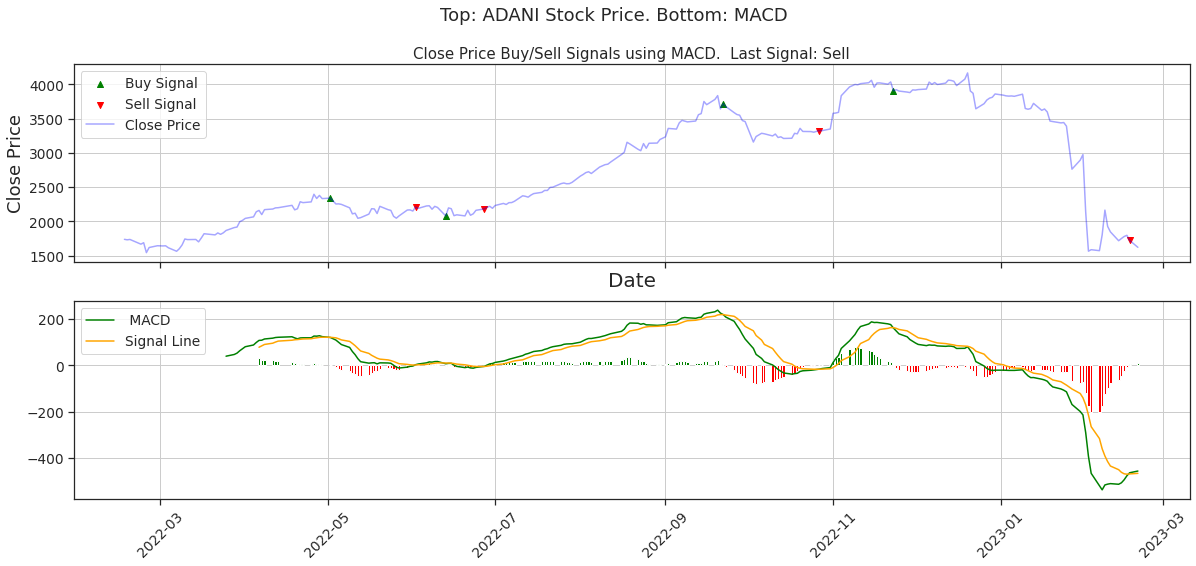

In [37]:
def plot_macd(company):
    macd = company
    # Create and plot the graph
    fig, axs = plt.subplots(2, sharex=True, figsize=(20,8))
    plot_price_and_signals(fig, company, macd, 'MACD', axs)

    axs[1].plot(macd['MACD'], label=' MACD', color = 'green')
    axs[1].plot(macd['MACD_Signal'], label='Signal Line', color='orange')
    positive = macd['MACD_Histogram'][(macd['MACD_Histogram'] >= 0)]
    negative = macd['MACD_Histogram'][(macd['MACD_Histogram'] < 0)]
    axs[1].bar(positive.index, positive, color='green')
    axs[1].bar(negative.index, negative, color='red')    
    axs[1].legend(loc='upper left')
    axs[1].grid()
    # print(os.path.abspath(image))
    plt.show()
plot_macd(get_macd(df.iloc[-504:]))

In [38]:
from ta.momentum import RSIIndicator
# from ta.volatility import BollingerBands

def get_rsi(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators
    rsi_time_period = 20

    rsi_indicator = RSIIndicator(close_prices, rsi_time_period)
    company['RSI'] = rsi_indicator.rsi()

    low_rsi = 40
    high_rsi = 70

    generate_buy_sell_signals(
        lambda x, company: company['RSI'].values[x] < low_rsi,
        lambda x, company: company['RSI'].values[x] > high_rsi,
    company, 'RSI')

    return company

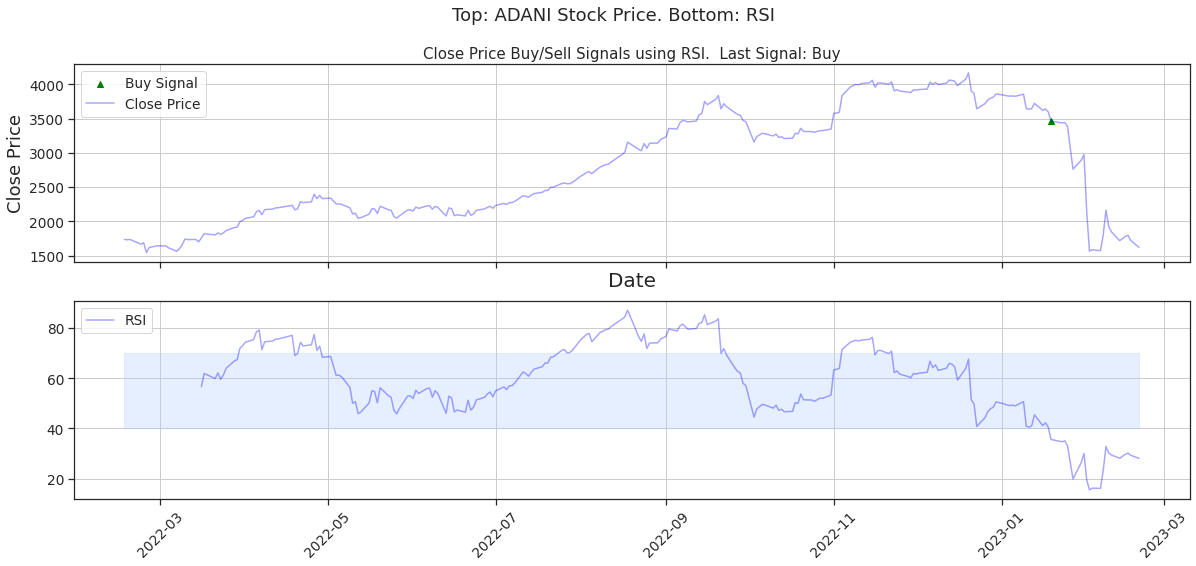

In [39]:
def plot_rsi(company):
      # image = f'images/{company.symbol}_rsi.png'
      rsi = company
      low_rsi = 40
      high_rsi = 70

      #plt.style.use('default')
      fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
      plot_price_and_signals(fig, company, rsi, 'RSI', axs)
      axs[1].fill_between(rsi.index, y1=low_rsi, y2=high_rsi, color='#adccff', alpha=0.3)
      axs[1].plot(rsi['RSI'], label='RSI', color='blue', alpha=0.35)
      axs[1].legend(loc='upper left')
      axs[1].grid()
      plt.show()
plot_rsi(get_rsi(df.iloc[-504:]))

In [40]:
from ta.volatility import BollingerBands
def get_bollinger_bands(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators

    window = 20
    indicator_bb = BollingerBands(close=close_prices, window=window, window_dev=2)

    # Add Bollinger Bands features
    company['Bollinger_Bands_Middle'] = indicator_bb.bollinger_mavg()
    company['Bollinger_Bands_Upper'] = indicator_bb.bollinger_hband()
    company['Bollinger_Bands_Lower'] = indicator_bb.bollinger_lband()

    generate_buy_sell_signals(
        lambda x, company: company['Close'].values[x] < company['Bollinger_Bands_Lower'].values[x],
        lambda x, company: company['Close'].values[x] > company['Bollinger_Bands_Upper'].values[x],
        company, 'Bollinger_Bands')

    return company

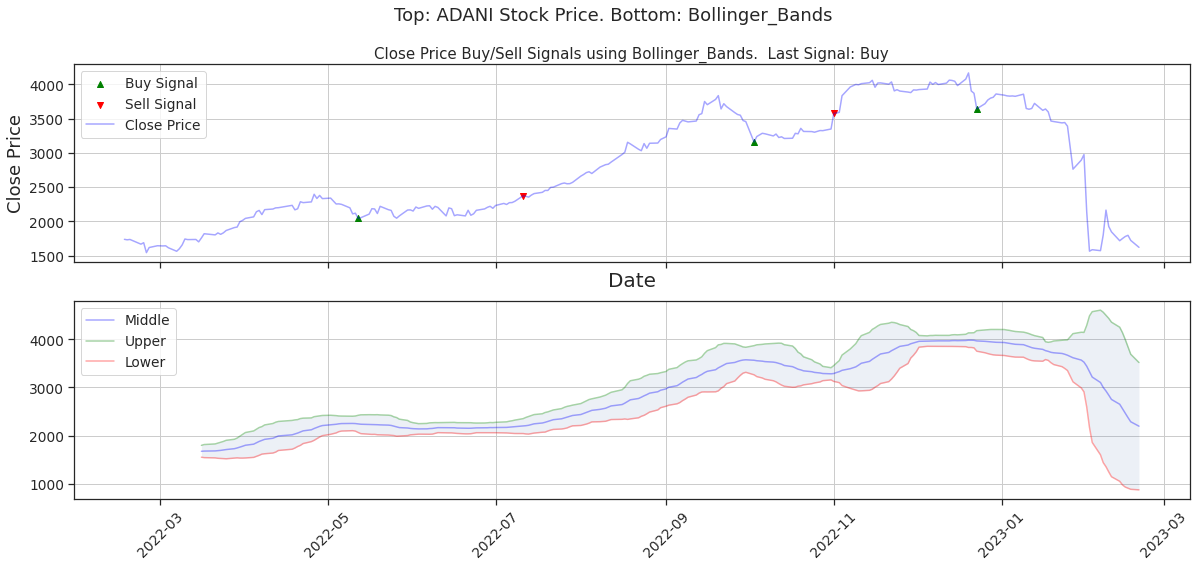

In [41]:
def plot_bollinger_bands(company):
        # image = f'images/{company.symbol}_bb.png'
        bollinger_bands = company

        fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
        plot_price_and_signals(fig, company, bollinger_bands, 'Bollinger_Bands', axs)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Middle'], label='Middle', color='blue', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Upper'], label='Upper', color='green', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Lower'], label='Lower', color='red', alpha=0.35)
        axs[1].fill_between(bollinger_bands.index, bollinger_bands['Bollinger_Bands_Lower'], bollinger_bands['Bollinger_Bands_Upper'], alpha=0.1)
        axs[1].legend(loc='upper left')
        axs[1].grid()

        plt.show()
plot_bollinger_bands(get_bollinger_bands(df.iloc[-504:]))

* The library has a bonus function. We can add all of the available technical indicators that have been coded in the ta library by calling the add_all_ta_features function.

* For this code to work, create a dataframe and ensure it contains the Open, High, Low and Close columns.

In [42]:
# df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume_BTC", fillna=True)

In [43]:
list_of_companies = ["ADANIENT.NS","TATASTEEL.NS","PAGEIND.NS","EICHERMOT.NS","INFY.NS"]
PS_ratios = {"ADANIENT.NS" : 1.37, "TATASTEEL.NS" : 0.55, "PAGEIND.NS" : 8.74, "EICHERMOT.NS": 6.47 , "INFY.NS":4.63}
PE_ratios = {"ADANIENT.NS" : 92.2, "TATASTEEL.NS" : 7.82, "PAGEIND.NS" : 63.1, "EICHERMOT.NS": 34.2, "INFY.NS":27.7}
PEG_ratios = {"ADANIENT.NS" : -28.8, "TATASTEEL.NS": 0.10 , "PAGEIND.NS" : 4.19, "EICHERMOT.NS": 228, "INFY.NS":3.02}
PB_ratios = {"ADANIENT.NS" : 5.68, "TATASTEEL.NS" : 1.29, "PAGEIND.NS" : 32.8, "EICHERMOT.NS": 6.74, "INFY.NS":8.92}
ROA_ratios = {"ADANIENT.NS" : "1.03%", "TATASTEEL.NS" : "15.8%", "PAGEIND.NS" : "28.2%" , "EICHERMOT.NS": "10.9%" , "INFY.NS":"19.6%"}
Current_Ratio_ratios = {"ADANIENT.NS" : 0.89, "TATASTEEL.NS" : 0.90 , "PAGEIND.NS" : 1.77 , "EICHERMOT.NS": 1.71 , "INFY.NS":1.76}
Operating_Margins_ratios = {"ADANIENT.NS" : "4.98%", "TATASTEEL.NS" : "16.1%" , "PAGEIND.NS" : "20.2%" , "EICHERMOT.NS": "23.6%", "INFY.NS":"24%"}
ROE_ratios = {"ADANIENT.NS" : "4.12%", "TATASTEEL.NS" : "42.6%" , "PAGEIND.NS" : "54.4%", "EICHERMOT.NS": "14%" , "INFY.NS": "29%"}
# Cash_Per_Share = {"ADANIENT.NS" : 1.37, "TATASTEEL.NS" : , "PAGEIND.NS" : , "EICHERMOT.NS": , "INFY.NS":}
D_S_Ratio_ratios = {"ADANIENT.NS" : 1.31, "TATASTEEL.NS" : 0.81, "PAGEIND.NS" : 0.12, "EICHERMOT.NS": 0.01, "INFY.NS":0.1}
Payout_Ratio_ratios = {"ADANIENT.NS" : "14.2%", "TATASTEEL.NS" : "15.5%", "PAGEIND.NS" : "76.9%" , "EICHERMOT.NS": "34.2%", "INFY.NS":"58.8%"}

In [44]:
# import yfinance as yf
adanient = yf.Ticker("ADANIENT.NS")
marketCap = adanient.fast_info['marketCap']
marketCap

1360590000000.0

In [45]:
# PS = adanient.info['priceToSalesTrailing12Months']
PS = PS_ratios["ADANIENT.NS"]
PS

1.37

In [46]:
# PE = adanient.info['trailingPE']
PE = PE_ratios["ADANIENT.NS"]
PE

92.2

In [47]:
# PEG = adanient.info['pegRatio']
PEG = PEG_ratios["ADANIENT.NS"]
PEG

-28.8

In [48]:
# PB = adanient.info['priceToBook']
PB = PB_ratios["ADANIENT.NS"]
PB

5.68

In [49]:
# ROA = adanient.info['returnOnAssets']
ROA = ROA_ratios["ADANIENT.NS"]
ROA

'1.03%'

In [50]:
# ROE = adanient.info['returnOnEquity']
ROE = ROE_ratios["ADANIENT.NS"]
ROE

'4.12%'

In [51]:
# profitMargins = adanient.info['profitMargins']
# profitMargins

In [52]:
# operatingMargins = adanient.info['operatingMargins']
operatingMargins = Operating_Margins_ratios["ADANIENT.NS"]
operatingMargins

'4.98%'

In [53]:
# currentRatio = adanient.info['currentRatio']
currentRatio = Current_Ratio_ratios["ADANIENT.NS"]
currentRatio

0.89

In [54]:
# totalCashPerShare = adanient.info['totalCashPerShare']
# totalCashPerShare

In [55]:
# debtToEquity = adanient.info['debtToEquity']
debtToEquity = D_S_Ratio_ratios["ADANIENT.NS"] 
debtToEquity

1.31

In [56]:
# payoutRatio = adanient.info['payoutRatio']
payoutRatio = Payout_Ratio_ratios["ADANIENT.NS"]
payoutRatio

'14.2%'